In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\shuca\OneDrive\Desktop\VS Code\Finance\2017_Yellow_Taxi_Trip_Data.csv')
df_original = df.copy()
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


## lets look at data

**Q 1:** check datatypes if there is changing change it

**Q 2:** check if there any useless columns then remove .

**Q 3:** check is there any duplicate data

**Q 4:**  check is there any missing value in the data

In [35]:
df.size

317786

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 3   passenger_count        22699 non-null  int64         
 4   trip_distance          22699 non-null  float64       
 5   PULocationID           22699 non-null  int64         
 6   DOLocationID           22699 non-null  int64         
 7   payment_type           22699 non-null  int64         
 8   fare_amount            22699 non-null  float64       
 9   extra                  22699 non-null  float64       
 10  mta_tax                22699 non-null  float64       
 11  tip_amount             22699 non-null  float64       
 12  improvement_surcharge  22699 non-null  float64       
 13  t

In [37]:
df.describe()

,VendorID,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,improvement_surcharge,total_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.299551,16.310502
std,0.496838,1.285231,3.653171,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,0.015673,16.097295
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,-0.300000,-120.300000
25%,1.000000,1.000000,0.990000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.300000,8.750000
50%,2.000000,1.000000,1.610000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.300000,11.800000
75%,2.000000,2.000000,3.060000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.300000,17.800000
max,2.000000,6.000000,33.960000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,0.300000,1200.290000


In [5]:
df.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [7]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
print('New data type updated :')
print(df.dtypes)

New data type updated :
Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object


In [11]:
#useless columns
df.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [13]:
uselsess_columns = ['Unnamed: 0','store_and_fwd_flag','RatecodeID','tolls_amount']
df.drop(columns=uselsess_columns, inplace=True)

In [15]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,improvement_surcharge,total_amount
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,100,231,1,13.0,0.0,0.5,2.76,0.3,16.56
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,186,43,1,16.0,0.0,0.5,4.00,0.3,20.80
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,262,236,1,6.5,0.0,0.5,1.45,0.3,8.75
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,188,97,1,20.5,0.0,0.5,6.39,0.3,27.69
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,4,112,2,16.5,0.5,0.5,0.00,0.3,17.80


In [16]:
#check is there any duplicated
df.shape

(22699, 14)

In [32]:
df.drop_duplicates().shape

(22699, 14)

In [34]:
#check if there any missing value in data
print('The number of missing value in data is : /n', df.isnull().sum())

The number of missing value in data is : /n VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
improvement_surcharge    0
total_amount             0
dtype: int64


## Data visualization 

# Histogram

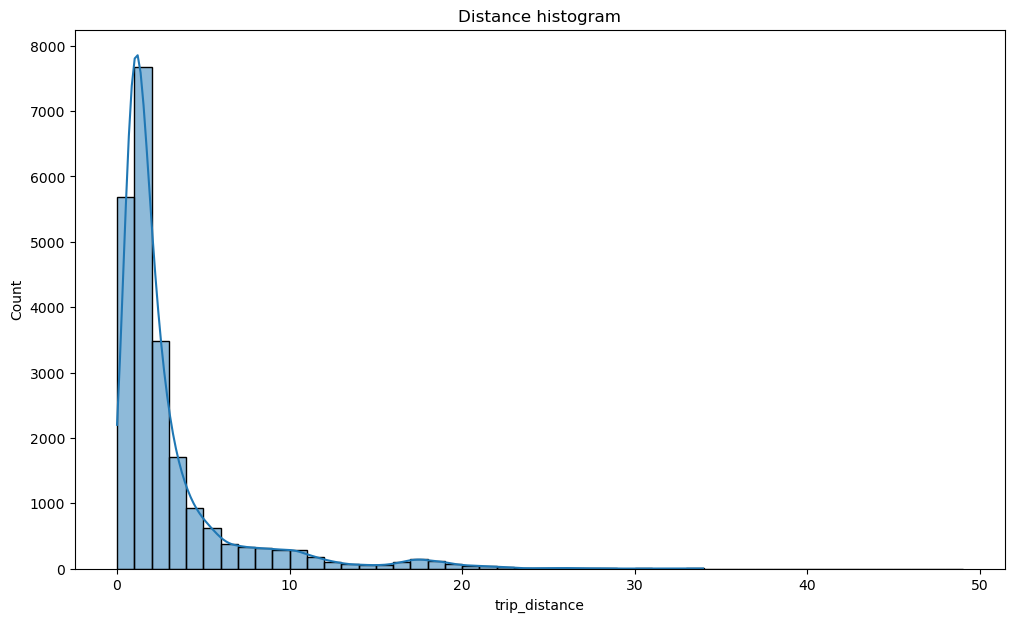

In [79]:
plt.figure(figsize=(12,7))
sns.histplot(df['trip_distance'], kde =True, bins=range(50))
plt.title('Distance histogram')
plt.show()


**trip_distance** Box plot

<Axes: xlabel='trip_distance'>

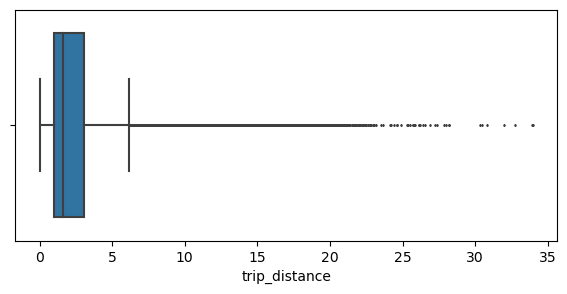

In [74]:
plt.figure(figsize=(7,3))
sns.boxplot(x=df['trip_distance'], fliersize=1)

In [72]:
df.trip_distance.max()

33.96

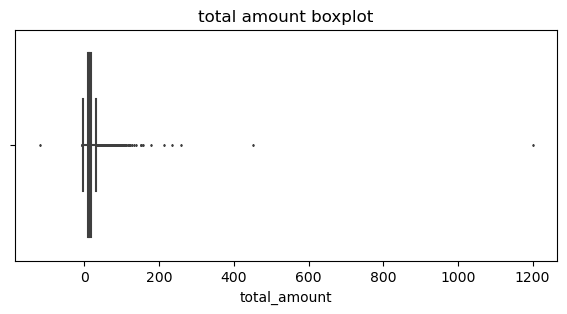

In [87]:
#total_amount boxplot
plt.figure(figsize=(7,3))
sns.boxplot(x=df['total_amount'], fliersize=1)
plt.title('total amount boxplot')
plt.show()

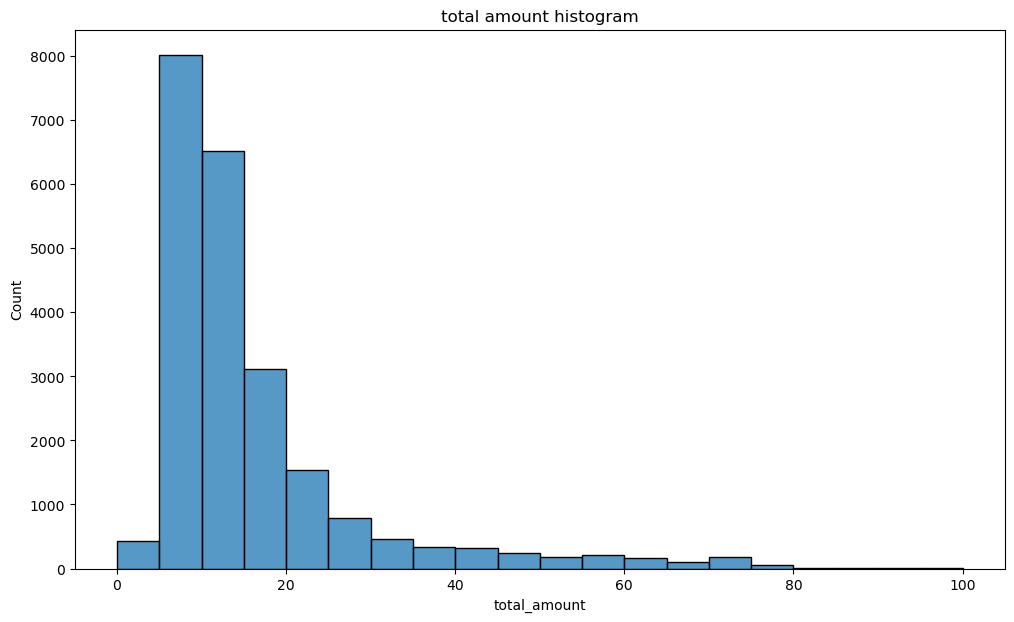

In [115]:
plt.figure(figsize=(12,7))
sns.histplot(data=None, x=df['total_amount'], bins=range(0,101,5))
plt.title('total amount histogram')
plt.show()

In [116]:
highest_pay =df.sort_values(by='total_amount', ascending=False).reset_index().head(10)
highest_pay

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,improvement_surcharge,total_amount
0,8476,1,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.60,226,226,1,999.99,0.0,0.0,200.00,0.3,1200.29
1,20312,2,2017-12-19 09:40:46,2017-12-19 09:40:55,2,0.00,265,265,2,450.00,0.0,0.0,0.00,0.3,450.30
2,13861,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,229,265,1,200.01,0.0,0.5,51.64,0.3,258.21
3,12511,2,2017-12-17 18:24:24,2017-12-17 18:24:42,1,0.00,265,265,1,175.00,0.0,0.0,46.69,0.3,233.74
4,15474,2,2017-06-06 20:55:01,2017-06-06 20:55:06,1,0.00,265,265,1,200.00,0.0,0.5,11.00,0.3,211.80
5,6064,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,138,1,1,107.00,0.0,0.0,55.50,0.3,179.06
6,16379,2,2017-11-30 10:41:11,2017-11-30 11:31:45,1,25.50,132,265,2,140.00,0.0,0.5,0.00,0.3,157.06
7,3582,1,2017-01-01 23:53:01,2017-01-01 23:53:42,1,7.30,1,1,1,152.00,0.0,0.0,0.00,0.3,152.30
8,11269,1,2017-06-19 00:51:17,2017-06-19 00:52:12,2,0.00,265,265,1,120.00,0.0,0.0,20.00,0.3,151.82
9,9280,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,132,265,2,150.00,0.0,0.0,0.00,0.3,150.30


In [134]:
top_10_disance =df.sort_values(by='trip_distance', ascending=False).reset_index().head(10)
top_10_disance

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,improvement_surcharge,total_amount
0,9280,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,132,265,2,150.00,0.0,0.0,0.00,0.3,150.30
1,13861,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,229,265,1,200.01,0.0,0.5,51.64,0.3,258.21
2,6064,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,138,1,1,107.00,0.0,0.0,55.50,0.3,179.06
3,10291,2,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,138,265,2,131.00,0.0,0.5,0.00,0.3,131.80
4,29,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,132,23,1,80.00,0.5,0.5,18.56,0.3,111.38
5,18130,1,2017-10-26 14:45:01,2017-10-26 16:12:49,1,30.50,132,220,1,90.50,0.0,0.5,19.85,0.3,119.31
6,5792,2,2017-08-11 14:14:01,2017-08-11 15:17:31,1,30.33,132,158,1,52.00,0.0,0.5,14.64,0.3,73.20
7,15350,2,2017-09-14 13:44:44,2017-09-14 14:34:29,1,28.23,13,132,1,52.00,0.0,0.5,4.40,0.3,62.96
8,10302,1,2017-05-15 08:11:34,2017-05-15 09:03:16,1,28.20,90,132,1,52.00,0.0,0.5,11.71,0.3,70.27
9,2592,2,2017-06-16 18:51:20,2017-06-16 19:41:42,1,27.97,261,132,2,52.00,4.5,0.5,0.00,0.3,63.06
